In [88]:
from keras.datasets import mnist
import cv2

In [89]:
import keras.utils.np_utils as ku
import keras.models as models
import keras.layers as layers
from keras import regularizers
from keras.optimizers import rmsprop
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt


In [90]:
from PIL import Image  # to plot images

In [91]:
%matplotlib inline

In [92]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()    #load MNIST data. Link to see data: http://yann.lecun.com/exdb/mnist/

In [93]:
print(train_images[4].shape) #look for the shape of the 4th image

(28, 28)


In [94]:
print(train_images[4])    #image in pixel wise. These are all grey scale images. So max value is 255

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113
   87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 18

In [95]:
img_array=(train_images[4])

In [96]:
Image.fromarray(img_array)   #vizualize the image

In [97]:
print(train_images.shape, train_labels.shape)   #printing training  images and training labels shape.. Labels would be corresponding to number of images

(60000, 28, 28) (60000,)


In [98]:
train_images = train_images.reshape((60000, 28*28)).astype('float32')/255

In [99]:
train_images[4]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [100]:
print(train_images.shape)    #we have made the 2D image with pixels to horizontal pixel hence instead of 28*28 it is showing 784 (i.e. 28*28)
print(train_images.dtype)   #The reshaping have been done to flattern the image from 2D to 1D for all 60000 images

(60000, 784)
float32


In [101]:
test_images = test_images.reshape((10000, 28*28)).astype('float32')/255          #same done for testing images
print(test_images.shape, test_labels.shape)

(10000, 784) (10000,)


In [102]:
print(train_labels)    #printing the labels which corresponds to the digit in the image

[5 0 4 ... 5 6 8]


In [103]:
train_labels = ku.to_categorical(train_labels)    #imposing one hot encoding to the labels since ML understands categorical values.
(train_labels)                              #refer https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f   for one hot encoding

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [104]:
test_labels = ku.to_categorical(test_labels)

In [105]:
test_labels   #one hot encoding gives 1 in that column which it recognizes. For eg. If image 1 is of 7, then in row 0 and column 7 would be 1

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [106]:
#The data is prepared, so it is time to start defining a neural nework model. 
#We are using a simple feedforward model which is one type of sequential model Keras can create. So creating Sequential model.

In [107]:
nn = models.Sequential()     #A sequential model object nn is defined.
nn

In [108]:
#number of input layers: number of features(here 784 i.e. 28*28; number of output layers: number of different categories (here 10 i.e. 0-9)
#General rule to select number of hidden layes in neural network:
#The number of hidden neurons should be between the size of the input layer and the size of the output layer.
#The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
#The number of hidden neurons should be less than twice the size of the input layer.
#try to have nearby value of hidden layers as power of 2.
#Here number of hidden layers = (2*784/3) + 10 = 533 ~ 512

In [109]:
nn.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, )))    #hidden layer
#This layer is dense (fully connected) with 512 units.
#The activation of each unit is rectilinear.
#The hidden layer is expecting an input tensor of $28*28$ by an undefined number of cases (images).
# link for activation function: https://towardsdatascience.com/activation-functions-and-its-types-which-is-better-a9a5310cc8f

In [110]:
nn.add(layers.Dense(10, activation = 'softmax'))   #output layer
#The output layer has 10 hidden units. We need 10 units since there are 10 categories of handwritten digits we are classifing.
#This is a Multinomial classification problem so we are using softmax activation.

In [111]:
nn.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])  #multinomial classification so we have used categorical_crossentropy
#optimizer link: https://towardsdatascience.com/a-look-at-gradient-descent-and-rmsprop-optimizers-f77d483ef08b
#loss function link: https://machinelearningmastery.com/loss-and-loss-functions-for-training-deep-learning-neural-networks/

In [112]:
nr.seed(9898)

In [113]:
nn.fit(train_images, train_labels, epochs = 5, batch_size = 128)   #RMSprop is stochastic gradient descent and has batch size of 128
#epoch, batch size: https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9

Epoch 1/5
60000/60000 [==============================] - 7s - loss: 0.2564 - acc: 0.9259     
Epoch 2/5
60000/60000 [==============================] - 7s - loss: 0.1033 - acc: 0.9693     
Epoch 3/5
60000/60000 [==============================] - 6s - loss: 0.0693 - acc: 0.9791     
Epoch 4/5
60000/60000 [==============================] - 6s - loss: 0.0503 - acc: 0.9853     
Epoch 5/5
60000/60000 [==============================] - 6s - loss: 0.0376 - acc: 0.9885     


In [115]:
nn.evaluate(test_images, test_labels)   #evaluate the testing data with the trained neural network

 9504/10000 [===========================>..] - ETA: 0s

[0.06587636031092262, 0.9808]

In [116]:
#training over epoch by making new sequential neural network model

In [117]:
## Define a sequential model and print a summary. All the functions are same that we did above except we are storing the fit model in history
#and increasing the epochs from 5 to 10.
nnt = models.Sequential()
nnt.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, )))
nnt.add(layers.Dense(10, activation = 'softmax'))
nnt.summary()

## Compile the model. 
nnt.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', 
                metrics = ['accuracy'])
 
## Fit the model saving the results to a history file 
nr.seed(4678)   
history = nnt.fit(train_images, train_labels, 
                  epochs = 10, batch_size = 128,
                  validation_data = (test_images, test_labels))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s - loss: 0.2574 - acc: 0.9258 - val_loss: 0.1307 - val_acc: 0.9601
Epoch 2/10
60000/60000 [==============================] - 8s - loss: 0.1025 - acc: 0.9694 - val_loss: 0.1060 - val_acc: 0.9658
Epoch 3/10
60000/60000 [==============================] - 9s - loss: 0.0671 - acc: 0.9799 - val_loss: 0.0846 - val_acc: 0.9724
Epoch 4/10
60000/60000 [==============================] - 8s - loss: 0.0490 - acc: 0.9852 - val_loss:

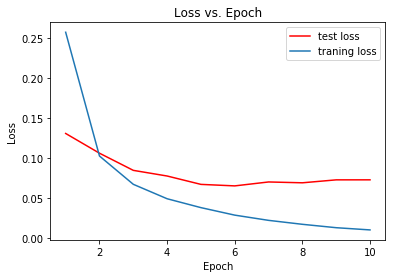

In [118]:
def plot_loss(history):
    train_loss = history.history['loss']
    test_loss = history.history['val_loss']
    x = list(range(1, len(test_loss) + 1))
    plt.plot(x, test_loss, color = 'red', label = 'test loss')
    plt.plot(x, train_loss, label = 'traning loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs. Epoch')
    plt.legend()
    
plot_loss(history)

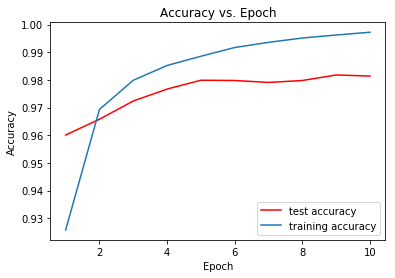

In [119]:
def plot_accuracy(history):
    train_acc = history.history['acc']
    test_acc = history.history['val_acc']
    x = list(range(1, len(test_acc) + 1))
    plt.plot(x, test_acc, color = 'red', label = 'test accuracy')
    plt.plot(x, train_acc, label = 'training accuracy')  
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Epoch')  
    plt.legend(loc='lower right')
    
plot_accuracy(history)

In [120]:
#Regularization Link: https://towardsdatascience.com/how-to-improve-a-neural-network-with-regularization-8a18ecda9fe3
nnt = models.Sequential()
nnt.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, ),
                        kernel_regularizer=regularizers.l2(0.01)))
nnt.add(layers.Dense(10, activation = 'softmax'))
nnt.summary()

## Define an optimzer object and compile the model

nnt.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
## Fit the compiled model 
nr.seed(8765)   
history = nnt.fit(train_images, train_labels, 
                  epochs = 10, batch_size = 128,
                  validation_data = (test_images, test_labels))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s - loss: 0.9200 - acc: 0.8881 - val_loss: 0.4137 - val_acc: 0.9283
Epoch 2/10
60000/60000 [==============================] - 13s - loss: 0.4269 - acc: 0.9192 - val_loss: 0.3818 - val_acc: 0.9268
Epoch 3/10
60000/60000 [==============================] - 12s - loss: 0.3836 - acc: 0.9300 - val_loss: 0.3222 - val_acc: 0.9456
Epoch 4/10
60000/60000 [==============================] - 13s - loss: 0.3589 - acc: 0.9358 - val_l

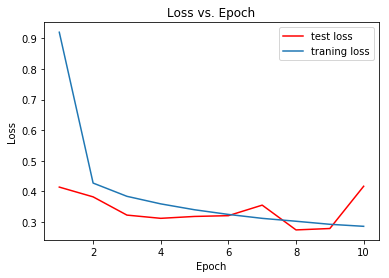

In [121]:
plot_loss(history)

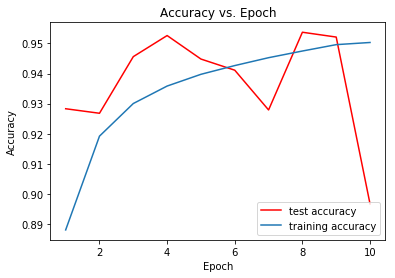

In [122]:
plot_accuracy(history)

In [124]:
#Adding another Hidden Layer in the neural network
nnt = models.Sequential()
nnt.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, ),
                        kernel_regularizer=regularizers.l2(0.001)))
nnt.add(layers.Dense(512, activation = 'relu', kernel_regularizer=regularizers.l2(0.001)))
nnt.add(layers.Dense(10, activation = 'softmax'))
nnt.summary()

## Define an optimzer object and compile the model
nnt.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
## Fit the compiled model 
nr.seed(8765)   
history = nnt.fit(train_images, train_labels, 
                  epochs = 10, batch_size = 128,
                  validation_data = (test_images, test_labels))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_17 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_18 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 19s - loss: 0.6665 - acc: 0.9195 - val_loss: 0.3044 - val_acc: 0.9658
Epoch 2/10
60000/60000 [==============================] - 19s - loss: 0.2764 - acc: 0.9597 - val_loss: 0.2099 - val_acc: 0.9712
Epoch 3/10
60000/60000 [==============================] - 20s - loss: 0.2123 - acc: 0.9664 - v

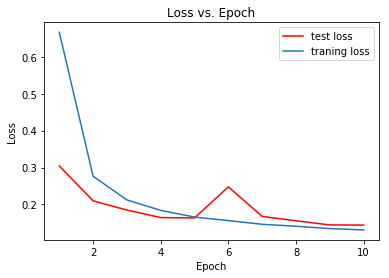

In [125]:
plot_loss(history)

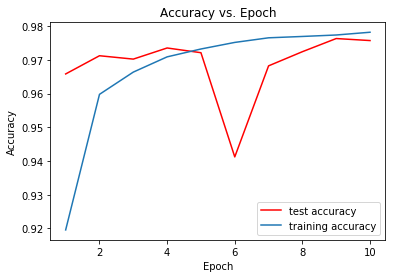

In [126]:
plot_accuracy(history)